## Low Pass filter on CSV, in Scala - with Graphics

> First, make sure the classes required by `EvilPlot` are in the Maven repo

For `EvilPlot` documentation:
- see [here](https://medium.com/swlh/plotting-in-jupyter-notebooks-with-scala-and-evilplot-aacab63a896)
- See [here](https://cibotech.github.io/evilplot/)
- and its [git repo](https://github.com/cibotech/evilplot).

- [Plot Catalog](https://cibotech.github.io/evilplot/plot-catalog.html)

In [1]:
//import coursier.MavenRepository
import coursierapi._
import coursier._

interp.repositories() ++= Seq(
  MavenRepository.of("https://nexus.corp.com/content/repositories/releases")
)
interp.repositories() ++= Seq(
  MavenRepository.of("https://mvnrepository.com/artifact")
)
interp.repositories() ++= Seq(
  MavenRepository.of("https://maven.imagej.net/content/repositories/public/")
)
interp.repositories() ++= Seq(
  MavenRepository.of("https://dl.bintray.com/cibotech/public")
)
interp.load.ivy("com.cibo" %% "evilplot-repl" % "0.8.0")  // Adds a _2.13 suffix
// import $ivy.`com.cibo::evilplot-repl:0.8.0`

interp.load.ivy("org.scala-js" %% "scalajs-dom_sjs1" % "1.1.0") // Adds a _2.13 suffix
// interp.load.ivy("org.scala-js" %% "scalajs-library" % "1.2.0") 


import coursierapi._

import coursier._



Import the required classes

In [2]:
import com.cibo.evilplot.plot._
//import com.cibo.evilplot.plot.aesthetics.DefaultTheme
import com.cibo.evilplot.plot.aesthetics.DefaultTheme._
import com.cibo.evilplot.numeric.Point
import com.cibo.evilplot.colors.HTMLNamedColors
import com.cibo.evilplot.geometry._

import com.cibo.evilplot.plot._
//import com.cibo.evilplot.plot.aesthetics.DefaultTheme

import com.cibo.evilplot.plot.aesthetics.DefaultTheme._

import com.cibo.evilplot.numeric.Point

import com.cibo.evilplot.colors.HTMLNamedColors

import com.cibo.evilplot.geometry._

A Sample graphic:

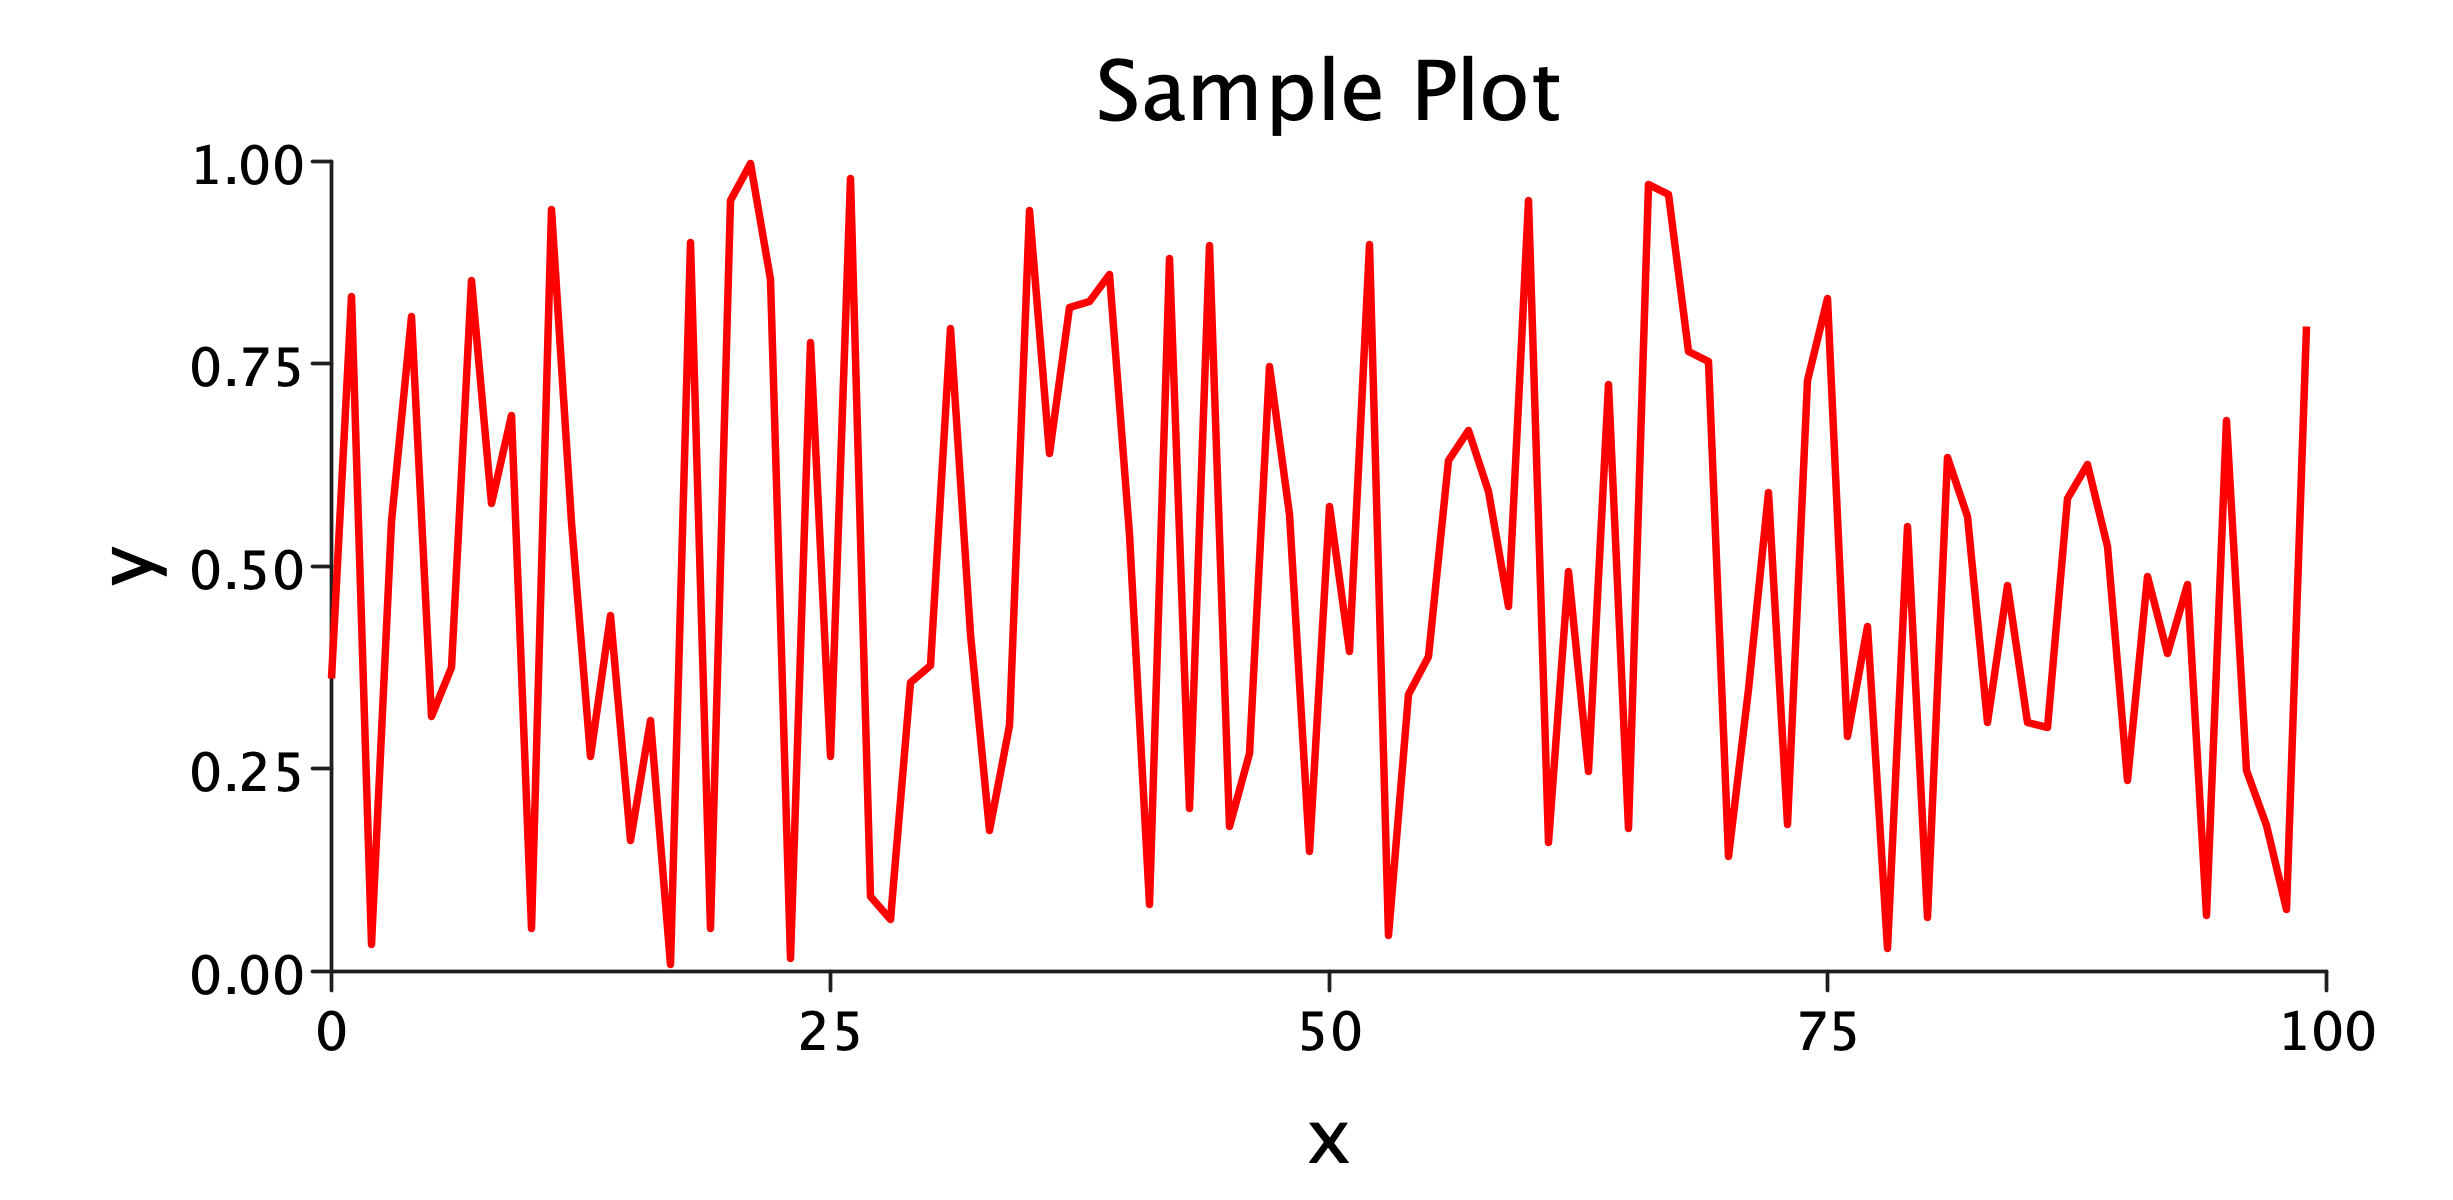

data: Seq[Point] = List(
  Point(0.0, 0.36144288808916725),
  Point(1.0, 0.8329362275908035),
  Point(2.0, 0.03335984124001801),
  Point(3.0, 0.5550571218122546),
  Point(4.0, 0.808590342149934),
  Point(5.0, 0.31427588306747456),
  Point(6.0, 0.37523618760593236),
  Point(7.0, 0.8522175871726141),
  Point(8.0, 0.5769423778191474),
  Point(9.0, 0.685765562412413),
  Point(10.0, 0.05286231304548905),
  Point(11.0, 0.9408581784241764),
  Point(12.0, 0.55430614463191),
  Point(13.0, 0.2649759088318481),
  Point(14.0, 0.439326219589248),
  Point(15.0, 0.16108158036626452),
  Point(16.0, 0.30912908055144095),
  Point(17.0, 0.008159469524246732),
  Point(18.0, 0.8991788986314768),
  Point(19.0, 0.05286610278204662),
  Point(20.0, 0.9514928725494858),
  Point(21.0, 0.9967903219594353),
  Point(22.0, 0.8543714308885403),
  Point(23.0, 0.016180453008608042),
  Point(24.0, 0.7762243077843879),
  Point(25.0, 0.26561572732044325),
  Point(26.0, 0.9789430160557187),
  Point(27.0, 0.0919831300838444

In [3]:
// Random Data, 100 random points
val data = Seq.tabulate(100) { i =>
  Point(i.toDouble, scala.util.Random.nextDouble())
}

val plot = LinePlot.series(data, "one", HTMLNamedColors.red)  // ScatterPlot(data)
  .xAxis()
  .yAxis()
  .frame()
  .title("Sample Plot")
  .xLabel("x")
  .yLabel("y")
  .render(Extent(600, 300))


def showPlot(plot: Drawable) =
  Image.fromRenderedImage(plot.asBufferedImage, Image.PNG).withHeight(300).withWidth(600)


showPlot(plot)


In [4]:
import scala.collection.mutable
import scala.util.Random

import scala.collection.mutable

import scala.util.Random

Set the filter's parameter and accumulator

In [5]:
val DATA_FILE = "./max.gust.csv"
val ALPHA = 0.15f // For the low pass filter (smoothing)
var accumulator:Double = 0

DATA_FILE: String = "./max.gust.csv"
ALPHA: Float = 0.15F
accumulator: Double = 51.47269113385271

Define the **filter** function

In [6]:
def lowPass(alpha: Double, value: Double, acc: Double) = (value * alpha) + (acc * (1d - alpha))

defined function lowPass

In [7]:
var doubleData = new mutable.ListBuffer[Double]()

doubleData: mutable.ListBuffer[Double] = ListBuffer()

Populate the data list

In [8]:
val bufferedSource = scala.io.Source.fromFile(DATA_FILE)
var lineNo = 0
try {
for (line <- bufferedSource.getLines) {
    lineNo += 1;
    val cols = line.split(",").map(_.trim)
    // do whatever you want with the columns here
    // println(s"${cols(0)}|${cols(1)}|${cols(2)}|${cols(3)}")
    if (lineNo > 1) {
        // Add cols(2), gust
        doubleData += cols(2).toDouble
    }
}
} catch {
    case ioe: java.io.IOException => {
        // Stream exhausted
    }
    case ex: Exception => ex.printStackTrace()
} finally {
    println("Closing the stream")
    try {
        // bufferedSource.close
    } catch {
    case ioe: java.io.IOException => {
        // Stream closed already
    }
    case ex: Exception => ex.printStackTrace()
    }
}
// println(s"Raw Data: $doubleData")

Closing the stream


bufferedSource: scala.io.BufferedSource = empty iterator
lineNo: Int = 1006

Plot raw data

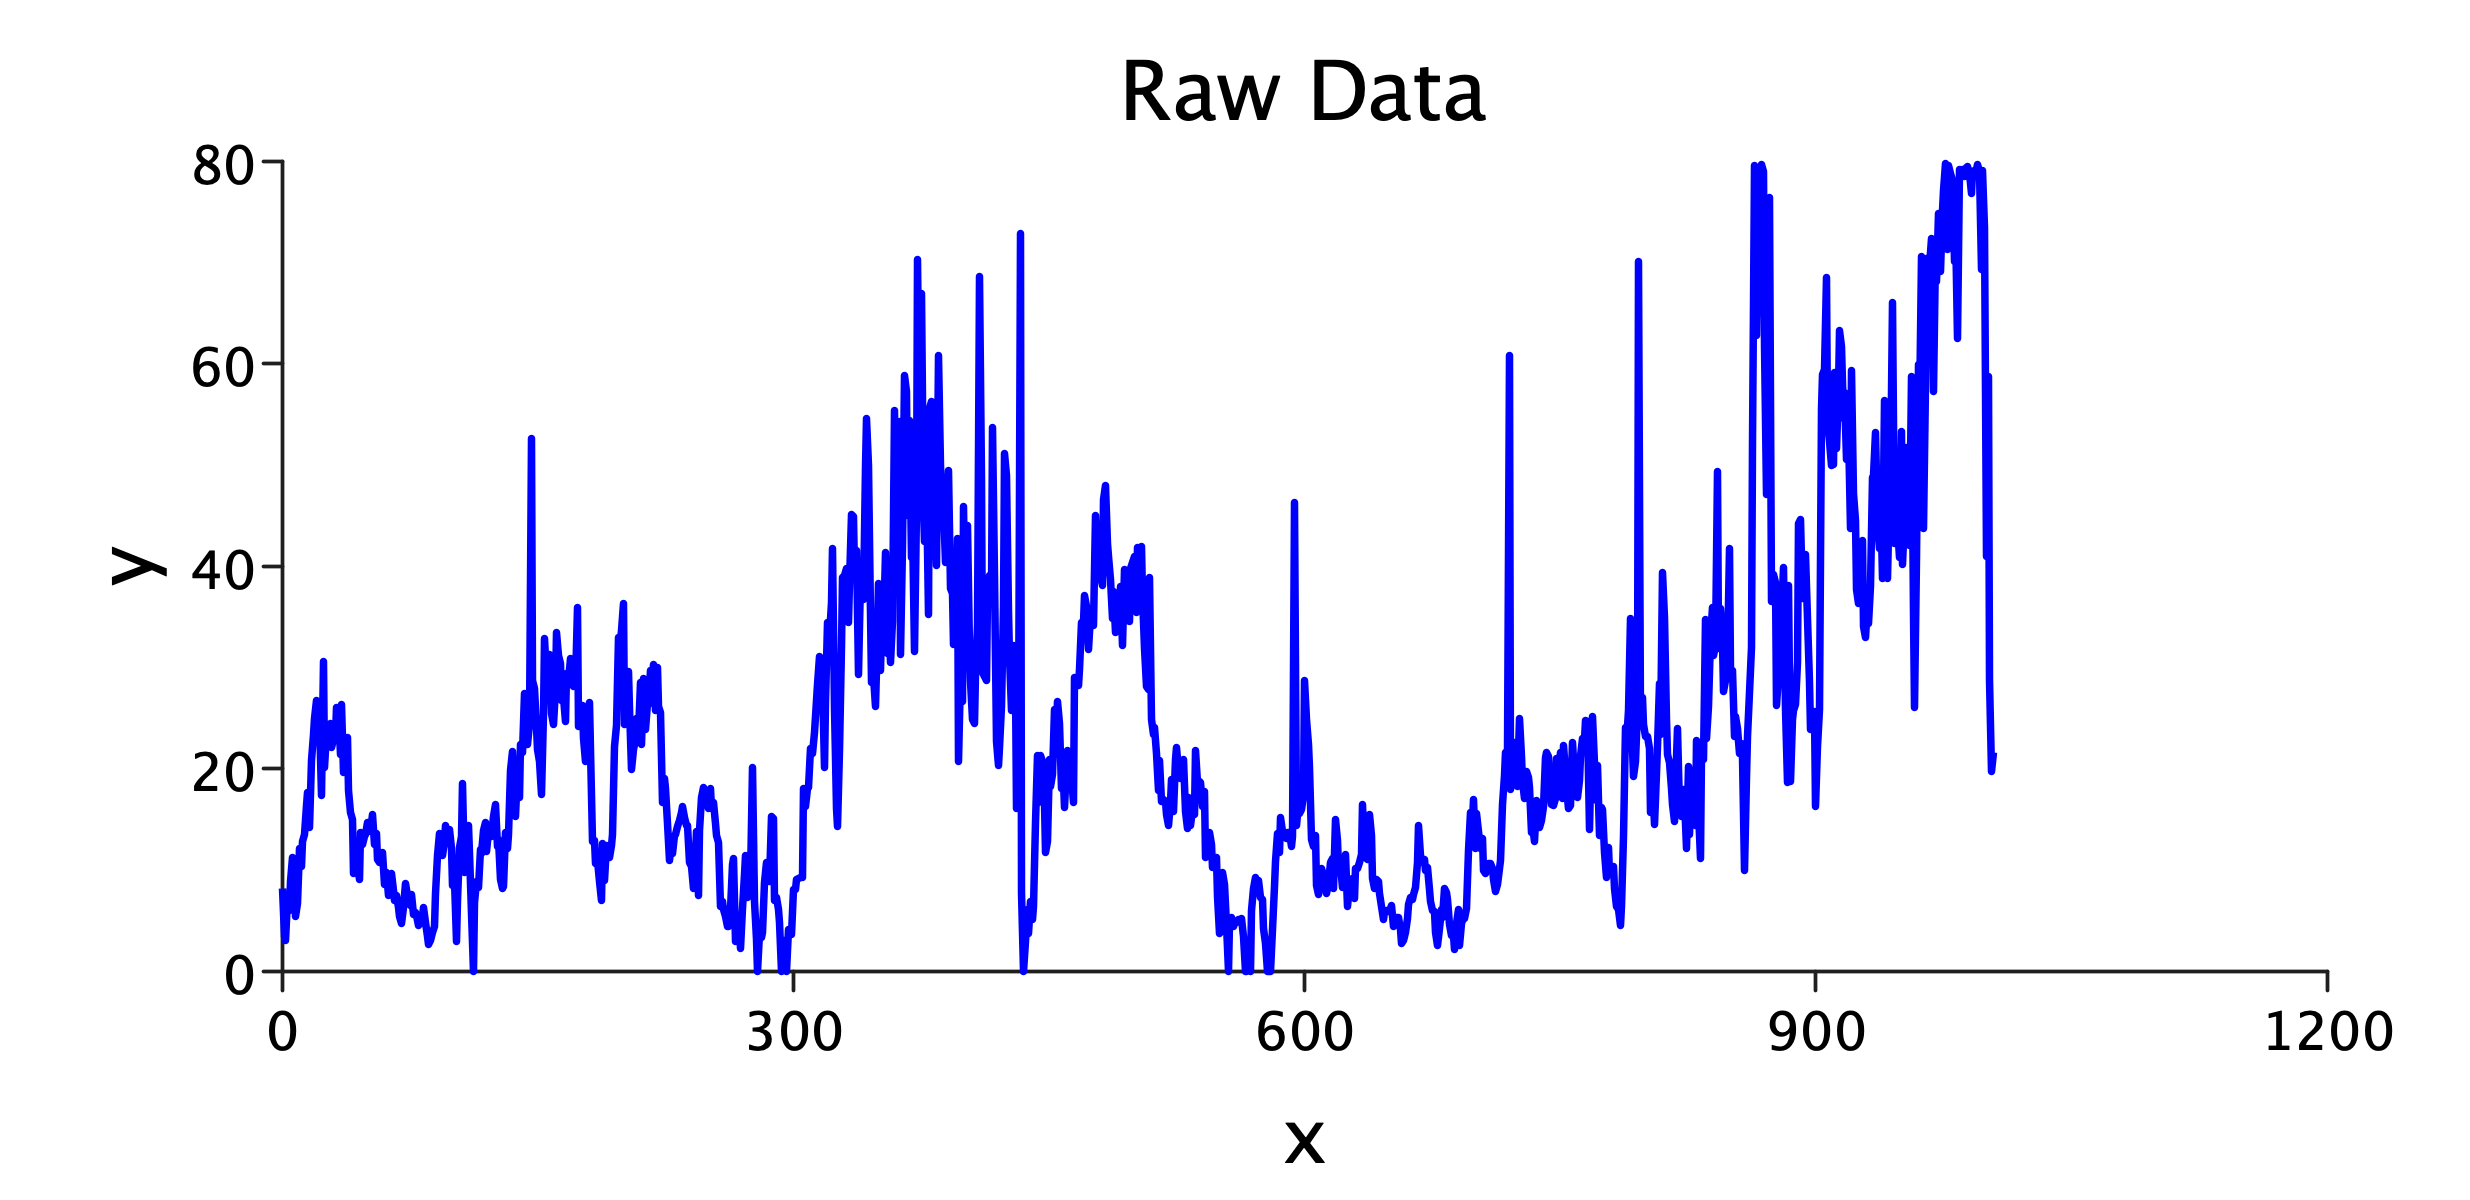

i: Int = 1005
defined function increment
defined class PointToPlot
rawData: Seq[PointToPlot] = List(
  PointToPlot(0.0, 8.16),
  PointToPlot(1.0, 3.42),
  PointToPlot(2.0, 3.04),
  PointToPlot(3.0, 7.1),
  PointToPlot(4.0, 6.02),
  PointToPlot(5.0, 8.83),
  PointToPlot(6.0, 11.2),
  PointToPlot(7.0, 10.31),
  PointToPlot(8.0, 5.4),
  PointToPlot(9.0, 6.73),
  PointToPlot(10.0, 12.11),
  PointToPlot(11.0, 10.3),
  PointToPlot(12.0, 12.85),
  PointToPlot(13.0, 13.55),
  PointToPlot(14.0, 16.34),
  PointToPlot(15.0, 17.64),
  PointToPlot(16.0, 14.22),
  PointToPlot(17.0, 20.77),
  PointToPlot(18.0, 23.39),
  PointToPlot(19.0, 24.92),
  PointToPlot(20.0, 26.78),
  PointToPlot(21.0, 26.45),
  PointToPlot(22.0, 24.86),
  PointToPlot(23.0, 17.31),
  PointToPlot(24.0, 30.63),
  PointToPlot(25.0, 20.08),
  PointToPlot(26.0, 23.54),
  PointToPlot(27.0, 23.05),
  PointToPlot(28.0, 24.44),
  PointToPlot(29.0, 22.13),
  PointToPlot(30.0, 22.89),
  PointToPlot(31.0, 23.14),
  PointToPlot(32.0, 26.06),
  PointToPlot(33.0, 25.69),
  PointToPlot(34.0, 21.38),
  PointToPlot(35.0, 26.38),
  PointToPlot(36.0, 19.59),
  PointToPlot(37.0, 22.67),
...
rawPoints: Seq[Point] = List(
  Point(0.0, 8.16),
  Point(1.0, 3.42),
  Point(2.0, 3.04),
  Point(3.0, 7.1),
  Point(4.0, 6.02),
  Point(5.0, 8.83),
  Point(6.0, 11.2),
  Point(7.0, 10.31),
  Point(8.0, 5.4),
  Point(9.0, 6.73),
  Point(10.0, 12.11),
  Point(11.0, 10.3),
  Point(12.0, 12.85),
  Point(13.0, 13.55),
  Point(14.0, 16.34),
  Point(15.0, 17.64),
  Point(16.0, 14.22),
  Point(17.0, 20.77),
  Point(18.0, 23.39),
  Point(19.0, 24.92),
  Point(20.0, 26.78),
  Point(21.0, 26.45),
  Point(22.0, 24.86),
  Point(23.0, 17.31),
  Point(24.0, 30.63),
  Point(25.0, 20.08),
  Point(26.0, 23.54),
  Point(27.0, 23.05),
  Point(28.0, 24.44),
  Point(29.0, 22.13),
  Point(30.0, 22.89),
  Point(31.0, 23.14),
  Point(32.0, 26.06),
  Point(33.0, 25.69),
  Point(34.0, 21.38),
  Point(35.0, 26.38),
  Point(36.0, 19.59),
  Point(37.0, 22.67),
...
rawPlot: Drawable = Group(
  Vector(
    Translate(
      StrokeStyle(
        Group(
          Vector(
            Translate(Rotate(Line(216.0, 1.0), 90.0), -0.5000000000000067, 0.0),
            Translate(Line(545.294921875, 1.0), 0.0, 215.5)
          )
        ),
        HSLA(0.0, 0.0, 12.0, 1.0)
      ),
      54.705078125,
      33.0
    ),
    Translate(
      Resize(
        LineDash(
          StrokeStyle(
            Translate(
              Path(
                Vector(
                  Point(0.0, 193.455),
                  Point(0.45441243489583333, 206.25300000000001),
                  Point(0.9088248697916667, 207.27900000000002),
                  Point(1.3632373046875, 196.317),
                  Point(1.8176497395833333, 199.23300000000003),
                  Point(2.2720621744791667, 191.64600000000002),
                  Point(2.726474609375, 185.247),
                  Point(3.1808870442708335, 187.65000000000003),
                  Point(3.6352994791666666, 200.907),
                  Point(4.0897119140625, 197.31600000000003),
                  Point(4.544124348958333, 182.79000000000002),
                  Point(4.998536783854167, 187.67700000000002),
                  Point(5.45294921875, 180.79200000000003),
                  Point(5.907361653645833, 178.90200000000002),
                  Point(6.361774088541667, 171.36900000000003),
                  Point(6.8161865234375, 167.859),
                  Point(7.270598958333333, 177.09300000000002),
...

In [9]:
// Raw Data
var i: Int = 0
def increment(): Int = {
    i += 1
    (i - 1)
}
final case class PointToPlot(x: Double, y: Double)
val rawData: Seq[PointToPlot] = Seq.fill(doubleData.size) {
  PointToPlot(i.toDouble, doubleData(increment()))
}
// println(s"i=$i")

val rawPoints = rawData.map(p => Point(p.x, p.y))

val rawPlot = LinePlot.series(rawPoints, "Raw", HTMLNamedColors.blue) 
  .xAxis()
  .yAxis()
  .frame()
  .title("Raw Data")
  .xLabel("x")
  .yLabel("y")
  .render(Extent(600, 300))

showPlot(rawPlot)

Filter and smooth it!

In [10]:
var filteredData = new mutable.ListBuffer[Double]()
doubleData.foreach(d => {
    accumulator = lowPass(ALPHA, d, accumulator)
    filteredData += accumulator
})
// println(s"Filtered: $filteredData")

filteredData: mutable.ListBuffer[Double] = ListBuffer(
  1.22400004863739,
  1.5534000544309614,
  1.7763900551271434,
  2.57493157858926,
  3.091691862335079,
  3.952438117187799,
  5.039572442808464,
  5.830136607801391,
  5.7656161140673685,
  5.910273702705439,
  6.840232684252872,
  7.3591978022367615,
  8.18281816462898,
  8.98789547192553,
  10.090711194958658,
  11.223104560712128,
  11.672638894468198,
  13.037243114522466,
  14.590156709051337,
  16.1396332642643,
  17.735688338046184,
  19.0428351392806,
  19.915409903061516,
  19.524598402072833,
  21.190408707955257,
  21.023847395143413,
  21.40127030086934,
  21.648579765566133,
  22.067292817369374,
  22.07669889513773,
  22.198694065714726,
  22.33988996146814,
  22.8979064894215,
  23.31672053265045,
  23.026212441209125,
  23.529280595017887,
  22.938388482285262,
  22.898130208342756,
...

Draw filtered Data

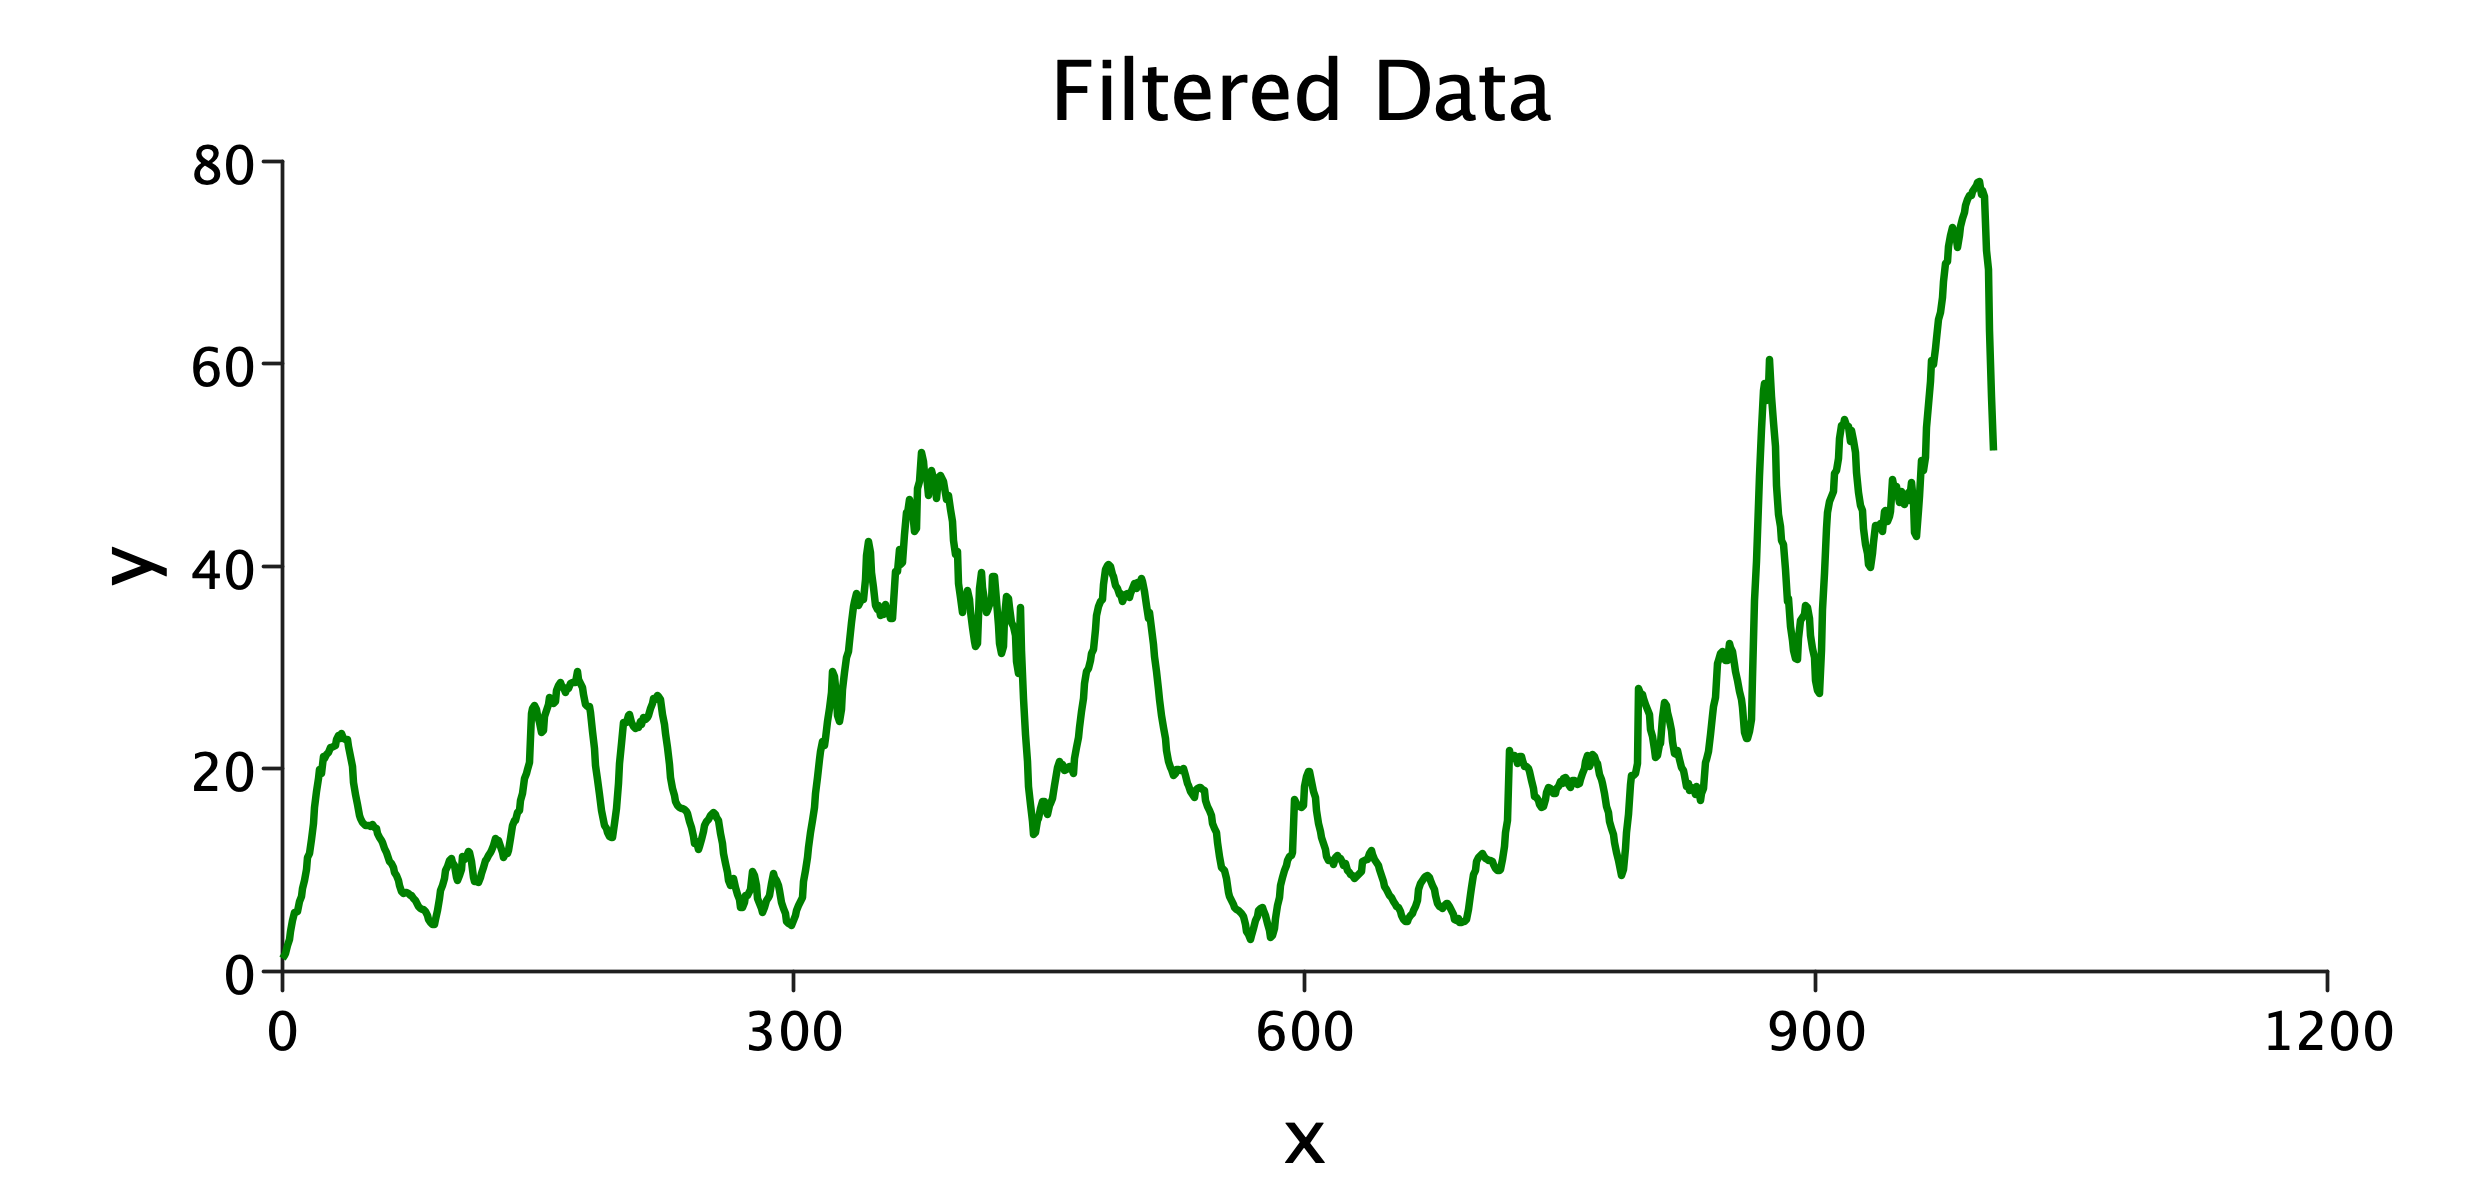

filteredDataPoints: Seq[PointToPlot] = List(
  PointToPlot(0.0, 1.22400004863739),
  PointToPlot(1.0, 1.5534000544309614),
  PointToPlot(2.0, 1.7763900551271434),
  PointToPlot(3.0, 2.57493157858926),
  PointToPlot(4.0, 3.091691862335079),
  PointToPlot(5.0, 3.952438117187799),
  PointToPlot(6.0, 5.039572442808464),
  PointToPlot(7.0, 5.830136607801391),
  PointToPlot(8.0, 5.7656161140673685),
  PointToPlot(9.0, 5.910273702705439),
  PointToPlot(10.0, 6.840232684252872),
  PointToPlot(11.0, 7.3591978022367615),
  PointToPlot(12.0, 8.18281816462898),
  PointToPlot(13.0, 8.98789547192553),
  PointToPlot(14.0, 10.090711194958658),
  PointToPlot(15.0, 11.223104560712128),
  PointToPlot(16.0, 11.672638894468198),
  PointToPlot(17.0, 13.037243114522466),
  PointToPlot(18.0, 14.590156709051337),
  PointToPlot(19.0, 16.1396332642643),
  PointToPlot(20.0, 17.735688338046184),
  PointToPlot(21.0, 19.0428351392806),
  PointToPlot(22.0, 19.915409903061516),
  PointToPlot(23.0, 19.524598402072833),

In [11]:
// Filtered Data
i = 0
val filteredDataPoints: Seq[PointToPlot] = Seq.fill(filteredData.size) {
  PointToPlot(i.toDouble, filteredData(increment()))
}

val filteredPoints = filteredDataPoints.map(p => Point(p.x, p.y))

val filteredPlot = LinePlot.series(filteredPoints, "Filtered", HTMLNamedColors.green) 
  .xAxis()
  .yAxis()
  .frame()
  .title("Filtered Data")
  .xLabel("x")
  .yLabel("y")
  .render(Extent(600, 300))

showPlot(filteredPlot)


That's it for now!